In [3]:
# Import the packages we will use
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
import math

import cooler

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
# The following directive activates inline plotting
%matplotlib inline

###### Read HiC matrix as a cooler

In [5]:
filepath_10kb = 'Rao2014-GM12878-MboI-allreps-filtered.10kb.cool'
cooler_10kb = cooler.Cooler(filepath_10kb)
filepath_5kb = 'Rao2014-GM12878-MboI-allreps-filtered.5kb.cool'
cooler_5kb = cooler.Cooler(filepath_5kb)
filepath_1kb = 'Rao2014-GM12878-MboI-allreps-filtered.1kb.cool'
cooler_1kb = cooler.Cooler(filepath_1kb)

###### Read loops coordinates, sizes and etc

In [6]:
loops_info = pandas.read_csv('GSE63525_GM12878_primary+replicate_HiCCUPS_looplist.txt', sep='\t',
                             dtype = {'x1': np.long, 'x2': np.long, 'y1': np.long, 'y2': np.long})

###### Utilities

In [7]:
def generate_chr_array_from_cooler(cooler, chr):
    '''
        Parse cooler bins to numpy array
    '''
    bins = cooler.bins()[:]

    bins_num = bins[bins.chrom == chr].shape[0]
    indx = bins[bins.chrom == chr].index.values
    start = indx[0]
    end = indx[-1]
    mat = cooler.matrix(balance=True, sparse=True)[start:end, start:end]
    return mat.toarray()

In [19]:
def plot_loops_on_hic_matrix(arr, resolution, loops_info):     
    '''
        plot loops with boundaries on a HiC map
    '''
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111)

    start = 0
    end = -1

    im = ax.matshow(arr[start:end, start:end], cmap='YlOrRd')
    fig.colorbar(im)

    for index, row in loops_info.iterrows():

        # the coordinates of the upstream locus corresponding to the peak pixel
        x1 = int(row['x1']/resolution)-start-.5
        x2 = int(row['x2']/resolution)-start-.5

        # the coordinates of the downstream locus corresponding to the peak pixel
        y1 = int(row['y1']/resolution)-start+0.5
        y2 = int(row['y2']/resolution)-start+0.5

        loop_y_centroid = int(row['centroid1']/resolution) - start
        loop_x_centroid = int(row['centroid2']/resolution) - start
        loop_radius = row['radius']/resolution

        loop_center = (loop_x_centroid, loop_y_centroid)

        ## loop as a circle with center in @loop_center with radius @loop_radius
        loop = matplotlib.patches.Circle(loop_center, loop_radius,
                                         fill=None, alpha=1, edgecolor='lime', linewidth=2.0)
        ax.add_patch(loop)

        ## areas with start locus and end locus
        loop_tr = matplotlib.patches.Rectangle((x2, x1), y2-x2, y1-x1, 
                                               fill=None, alpha=1, edgecolor='black', linewidth=.5)
        ax.add_patch(loop_tr)

###### Select chromose to work with

In [9]:
chr_index = 1
chr = 'chr' + str(chr_index)
loops = loops_info[loops_info.chr1 == str(chr_index)]

### 10kb resolution

In [10]:
arr_10kb = generate_chr_array_from_cooler(cooler_10kb, chr)
resolution = 10**4

In [11]:
log10arr_10kb = np.log10(arr_10kb)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


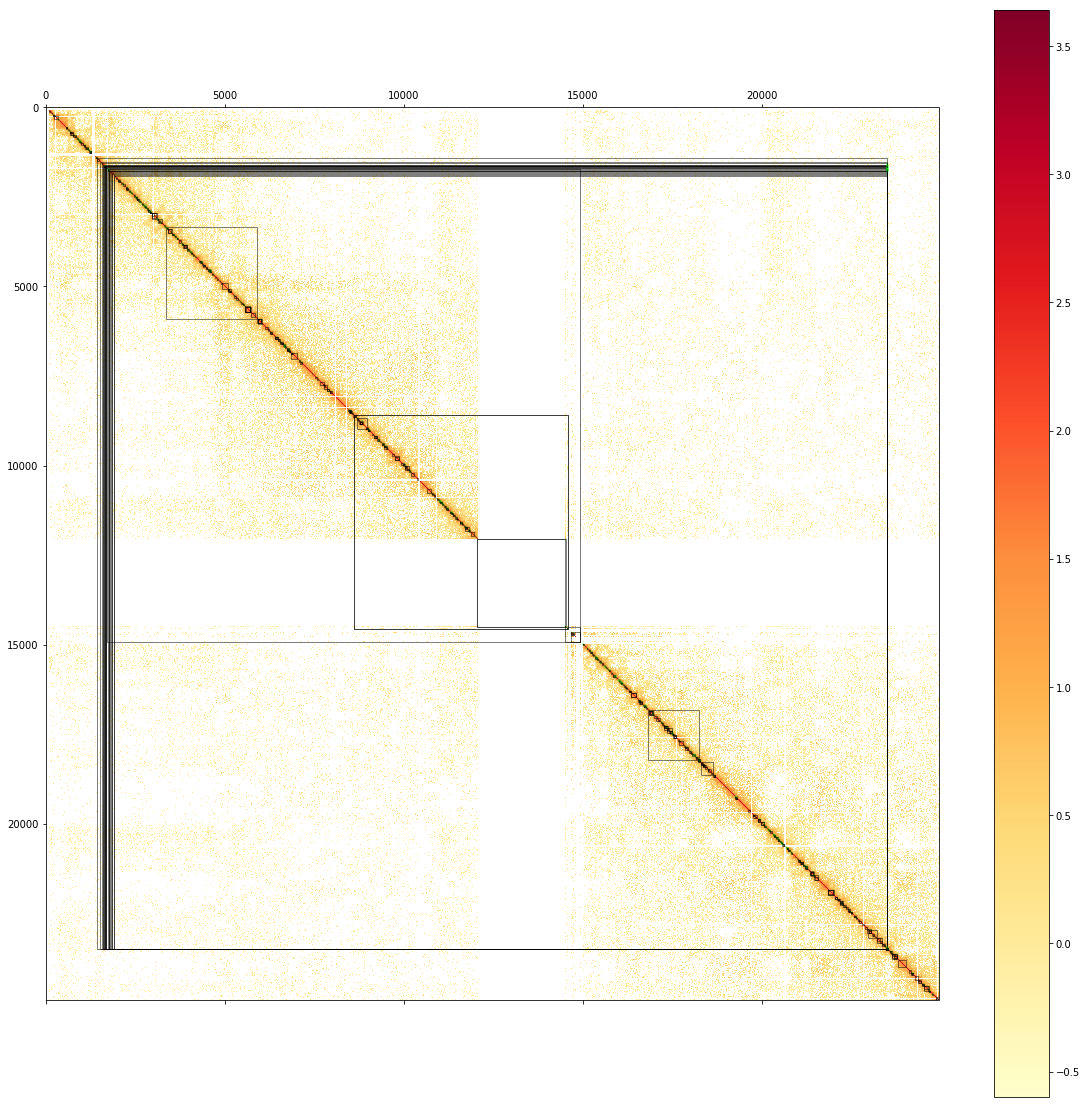

In [20]:
plot_loops_on_hic_matrix(log10arr_10kb, resolution, loops)

### 5kb resolution

In [112]:
arr_5kb = generate_chr_array_from_cooler(cooler_5kb, chr)
resolution = 5 * 10**3

In [113]:
log10arr_5kb = np.log10(arr_5kb)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


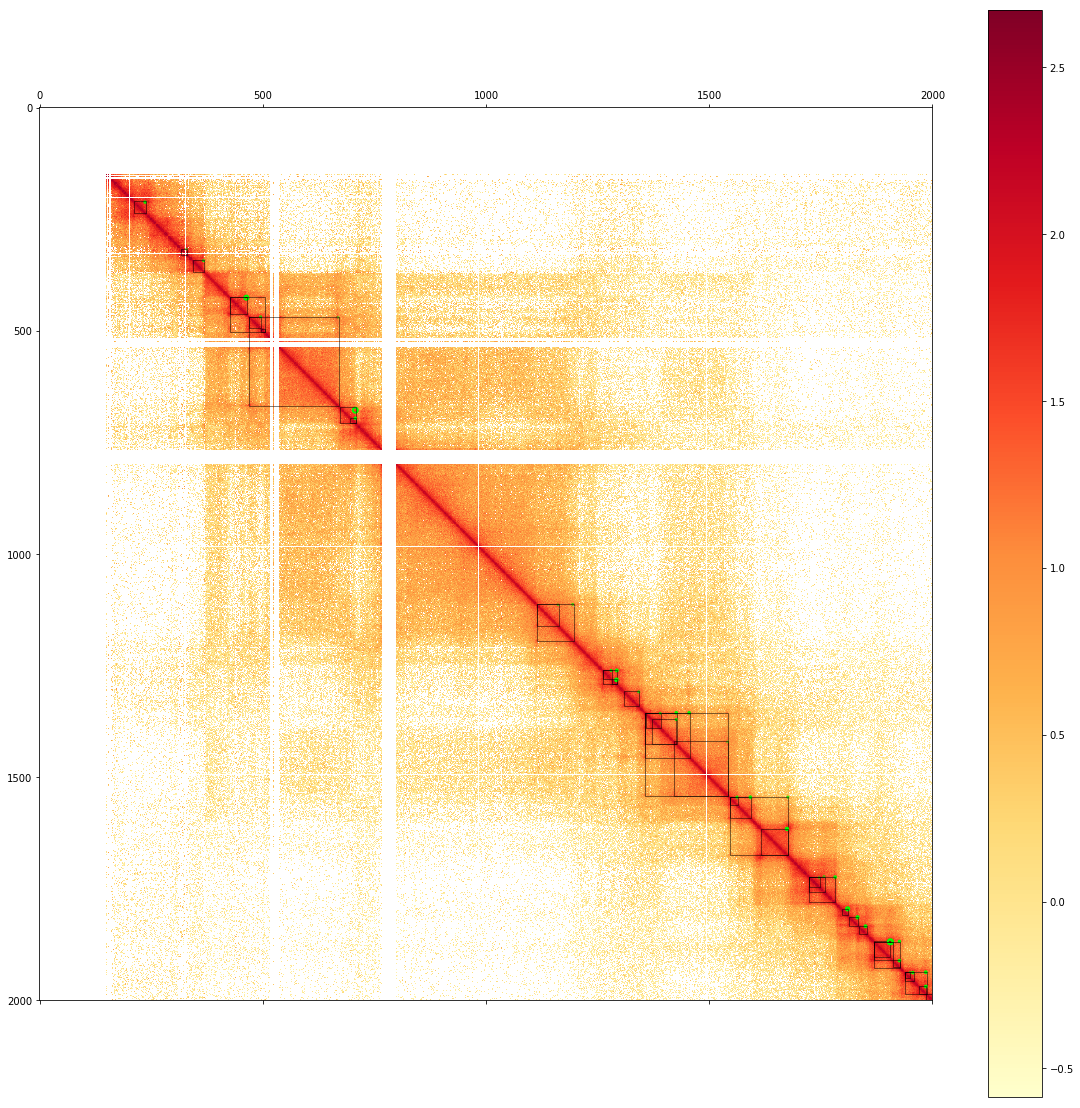

In [13]:
plot_loops_on_hic_matrix(log10arr_5kb, 5*10**3, loops)

### 1kb resolution 

In [ ]:
# arr_1kb = generate_chr_array_from_cooler(cooler_1kb, chr)
# resolution = 10**3

In [ ]:
# log10arr_1kb = np.log10(arr_1kb)

In [ ]:
# plot_loops_on_hic_matrix(cooler1kb, 10**3, chr_index)

### Average loop

###### 5kb

In [123]:
resolution = 5*10**3

row = loops.iloc[100]

window_size = 13
loop_sum = np.zeros((window_size, window_size))

for index, row in loops_info.iterrows():

    loop_y_centroid = int(row.centroid1/resolution)
    loop_x_centroid = int(row.centroid2/resolution)

    loop_window = log10arr_5kb[loop_y_centroid-math.floor(window_size/2):loop_y_centroid+math.ceil(window_size/2),
                               loop_x_centroid-math.floor(window_size/2):loop_x_centroid+math.ceil(window_size/2)]

    loop_window[loop_window == -np.inf] = -1
    loop_sum += np.nan_to_num(loop_window)

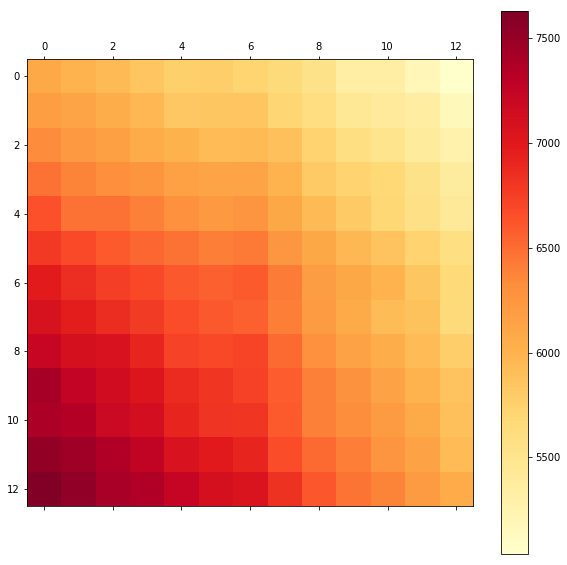

In [124]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

im = ax.matshow(loop_sum, cmap='YlOrRd')

fig.colorbar(im)

1.490711984998


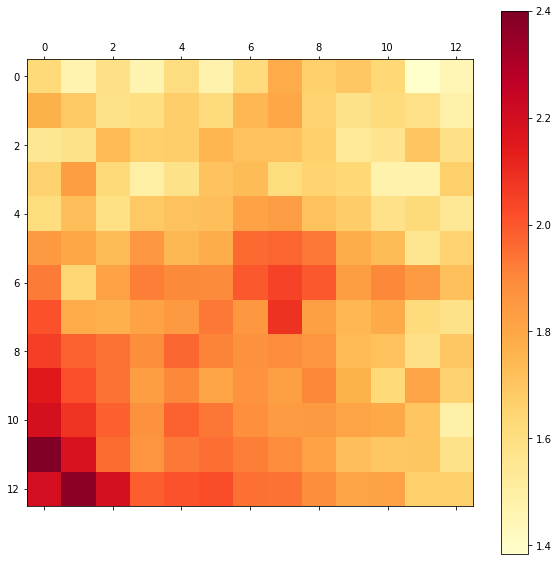

In [127]:
row = loops.iloc[123]

loop_y_centroid = int(row.centroid1/resolution)
loop_x_centroid = int(row.centroid2/resolution)

loop_window = log10arr_5kb[loop_y_centroid-math.floor(window_size/2):loop_y_centroid+math.ceil(window_size/2),
                            loop_x_centroid-math.floor(window_size/2):loop_x_centroid+math.ceil(window_size/2)]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

im = ax.matshow(loop_window, cmap='YlOrRd')

fig.colorbar(im)

print(row.radius/resolution)